In [18]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio
import scipy.io.wavfile

In [19]:
Fs, y = scipy.io.wavfile.read('train_bird.wav')
Audio(y, rate=Fs)

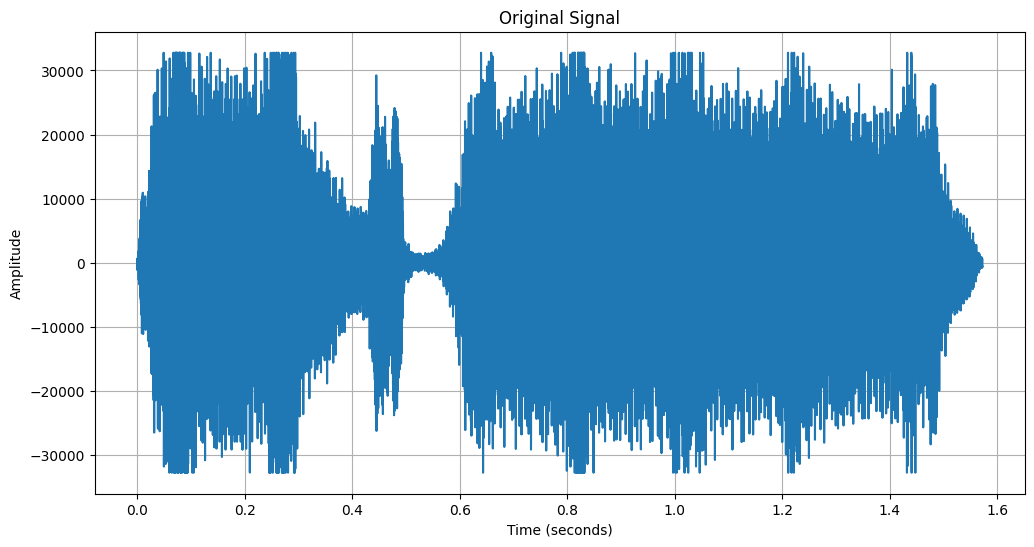

In [29]:
# Plot the original signal
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y)) / Fs, y)
plt.title("Original Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [21]:
Y = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y), 1/Fs)

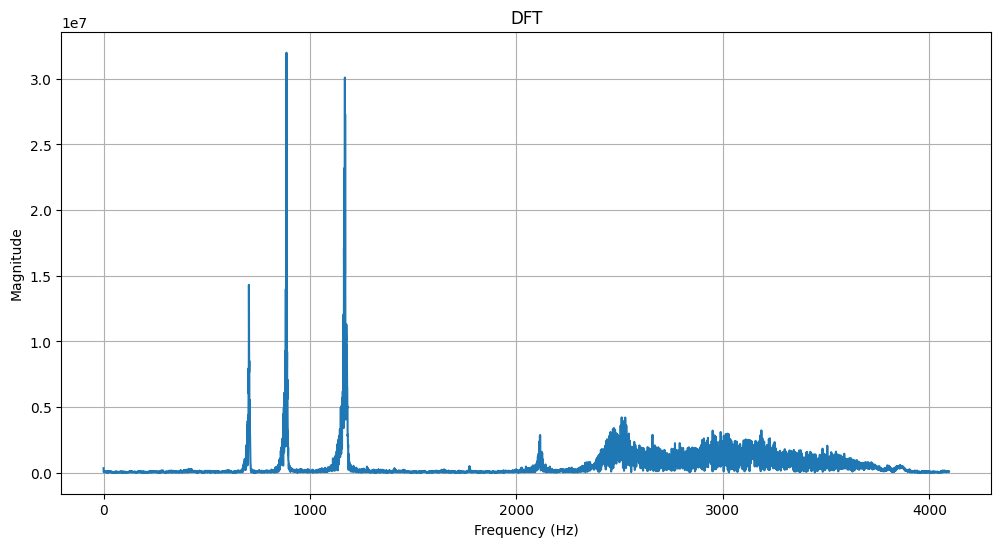

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(y)//2], np.abs(Y[:len(y)//2]))
plt.title("DFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [42]:
cutoff = 1300
low_pass_filter = np.ones(len(Y))
low_pass_filter[np.abs(frequencies) > cutoff] = 0

low_passed_signal = np.fft.ifft(Y * low_pass_filter)

In [43]:
cutoff = 2000
high_pass_filter = np.zeros(len(Y))
high_pass_filter[np.abs(frequencies) > cutoff] = 1

high_passed_signal = np.fft.ifft(Y * high_pass_filter)

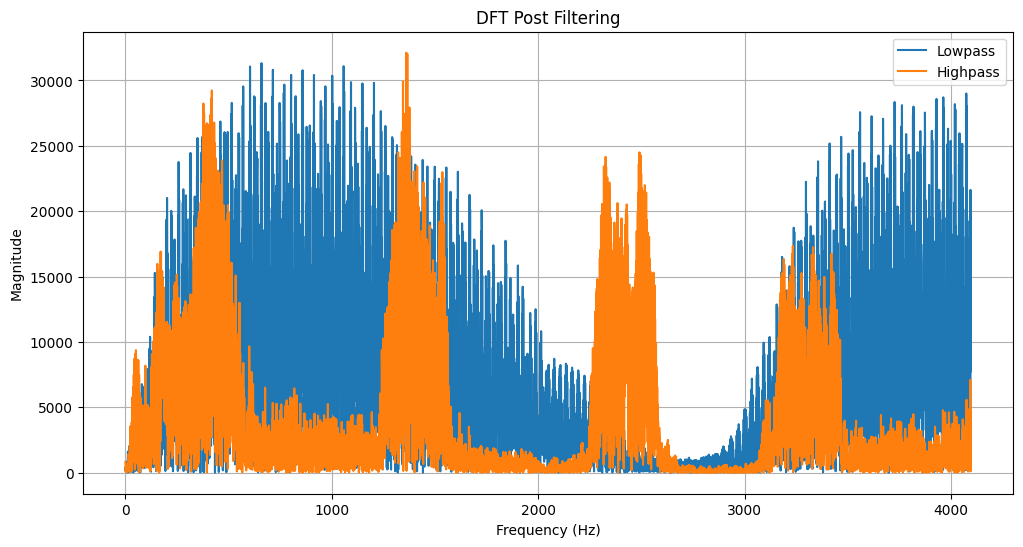

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(y)//2], np.abs(low_passed_signal[:len(y)//2]), label='Lowpass')
plt.plot(frequencies[:len(y)//2], np.abs(high_passed_signal[:len(y)//2]), label='Highpass')
plt.title("DFT Post Filtering")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

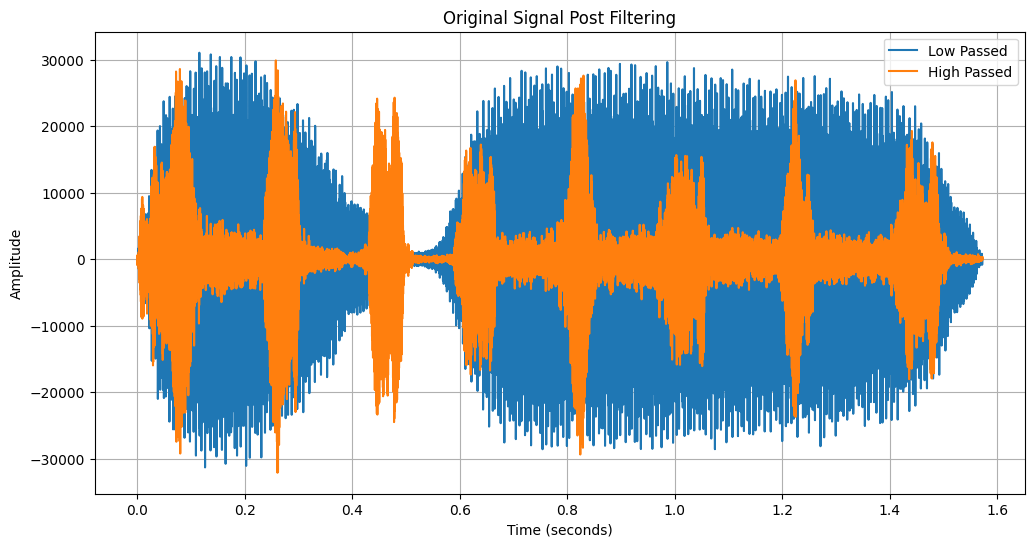

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y)) / Fs, low_passed_signal.real, label='Low Passed')
plt.plot(np.arange(len(y)) / Fs, high_passed_signal.real, label='High Passed')
plt.title("Original Signal Post Filtering")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [47]:
Audio(low_passed_signal.real, rate=Fs)

In [48]:
Audio(high_passed_signal.real, rate=Fs)
